<a href="https://colab.research.google.com/github/y-jacobs/MonetizeArt/blob/main/Content_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for loading/processing the images
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            flowers.append(file.name)


In [ ]:
# load the image as a 224x224 array
img = load_img(flowers[0], target_size=(256, 256))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(256, 256, 3)


In [ ]:
reshaped_img = img.reshape(1,256,256,3)
print(reshaped_img.shape)

(1, 256, 256, 3)


In [ ]:
x = preprocess_input(reshaped_img)

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
data = {}
p = "flower_features.pkl"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)


# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))


# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)


# get the unique labels (from the flower_labels.csv)

unique_labels = list(range(30))

1/1 [==============================] - 1s 584ms/step


In [ ]:
data

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
unique_labels

In [ ]:
kmeans = KMeans(n_clusters=30, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=30, random_state=22)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
groups

==========================CLASS 0 ===========================


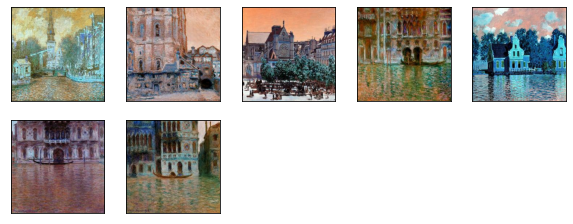

==========================CLASS 1 ===========================


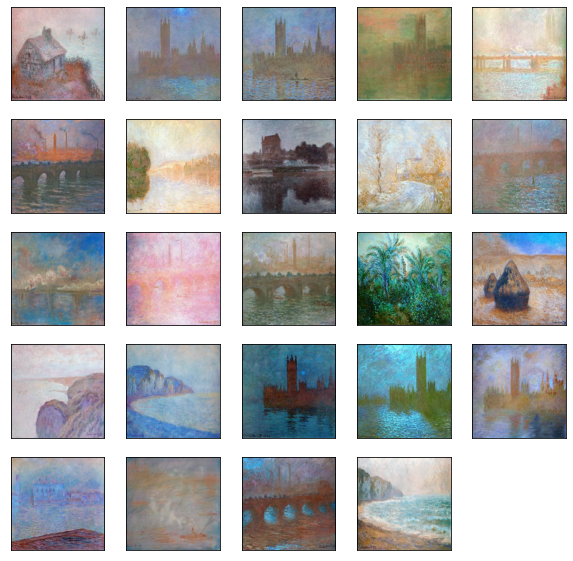

==========================CLASS 2 ===========================


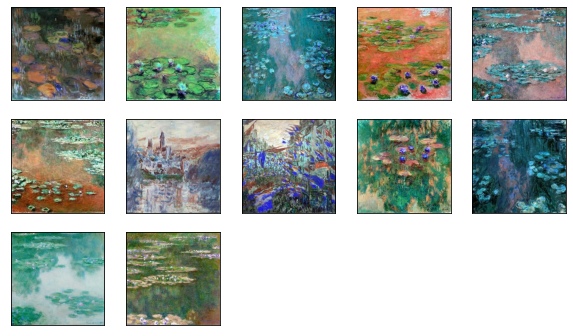

==========================CLASS 3 ===========================


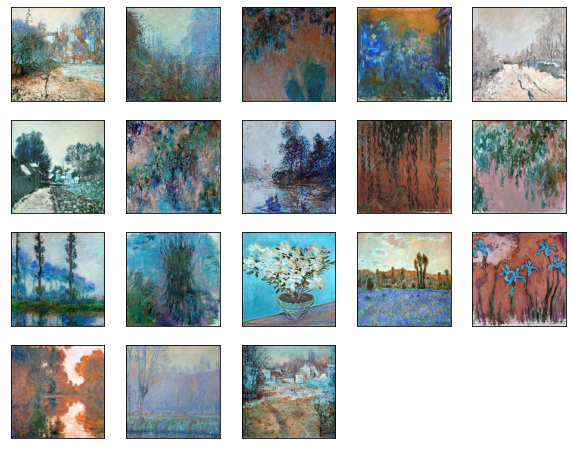

==========================CLASS 4 ===========================


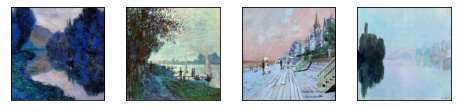

==========================CLASS 5 ===========================


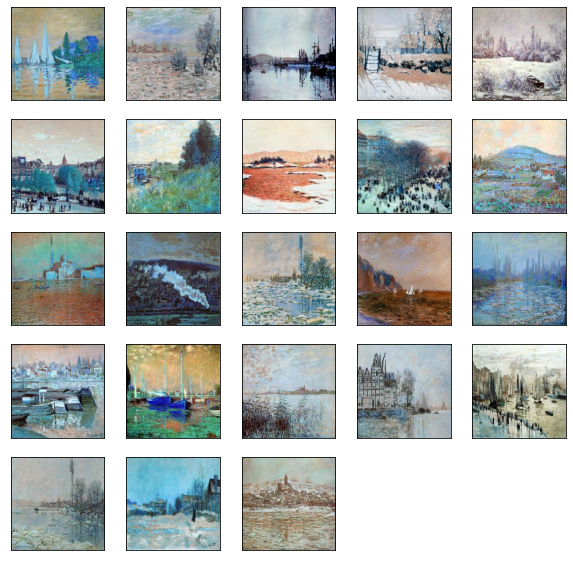

==========================CLASS 6 ===========================


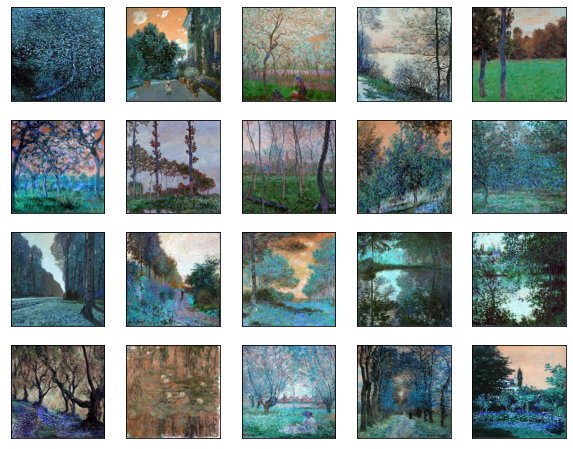

==========================CLASS 7 ===========================


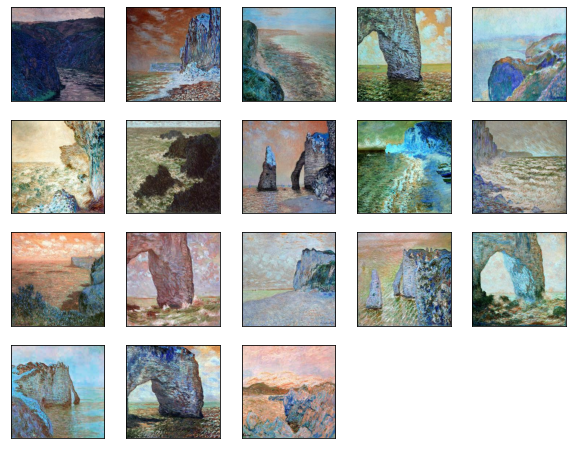

==========================CLASS 8 ===========================


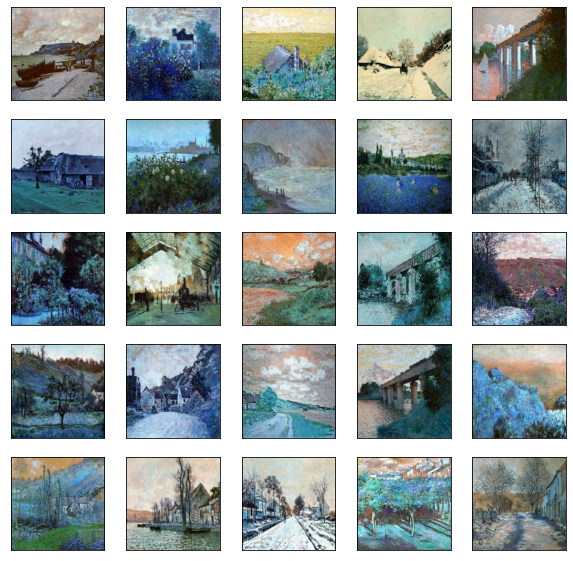

==========================CLASS 9 ===========================


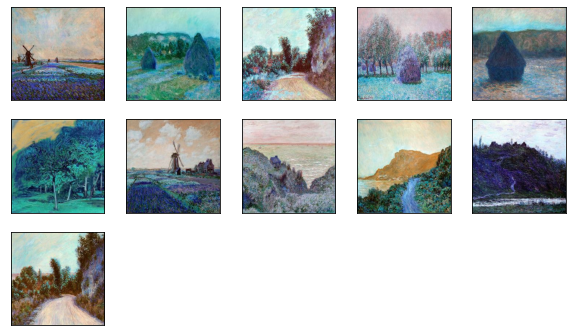

==========================CLASS 10 ===========================


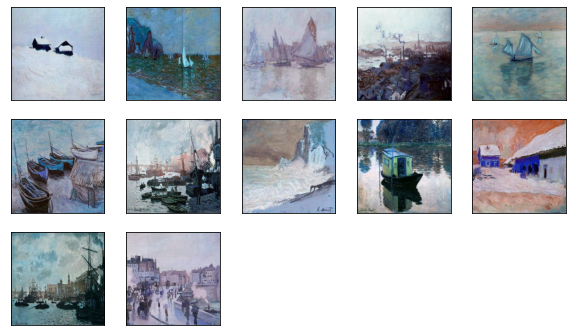

==========================CLASS 11 ===========================


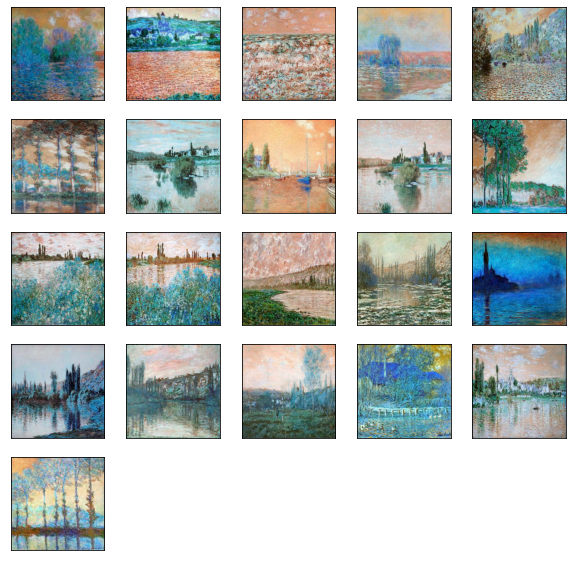

==========================CLASS 12 ===========================


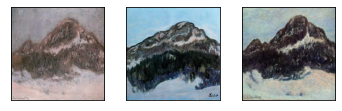

==========================CLASS 13 ===========================


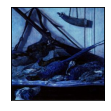

==========================CLASS 14 ===========================


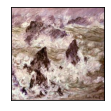

==========================CLASS 15 ===========================


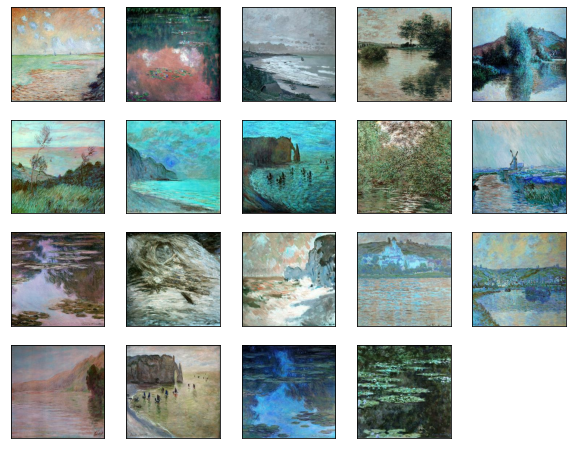

==========================CLASS 16 ===========================


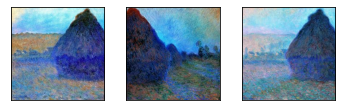

==========================CLASS 17 ===========================


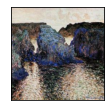

==========================CLASS 18 ===========================


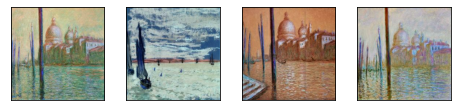

==========================CLASS 19 ===========================


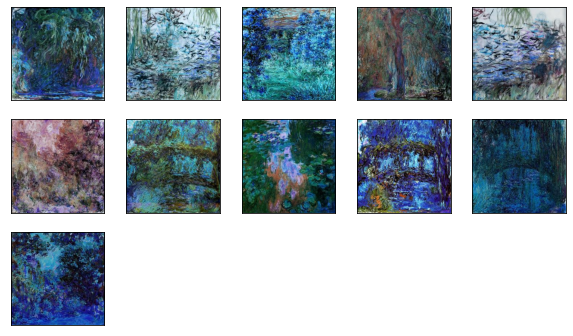

==========================CLASS 20 ===========================


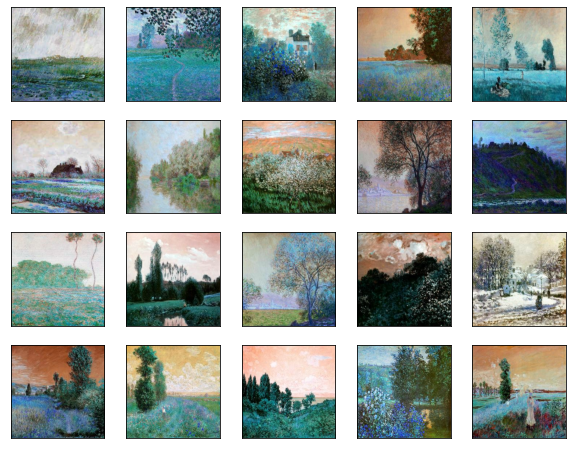

==========================CLASS 21 ===========================


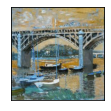

==========================CLASS 22 ===========================


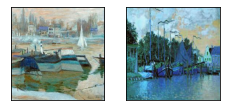

==========================CLASS 23 ===========================


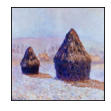

==========================CLASS 24 ===========================


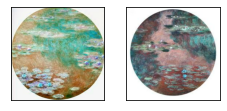

==========================CLASS 25 ===========================


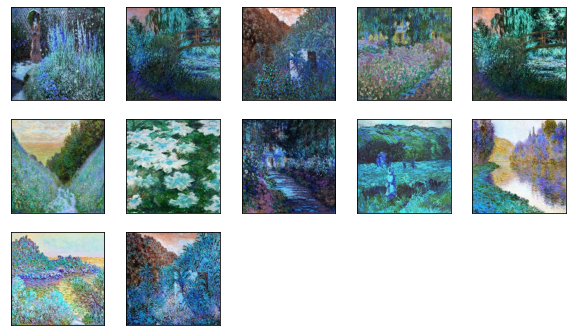

==========================CLASS 26 ===========================


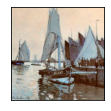

==========================CLASS 27 ===========================


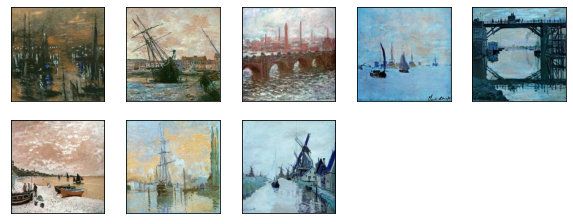

==========================CLASS 28 ===========================


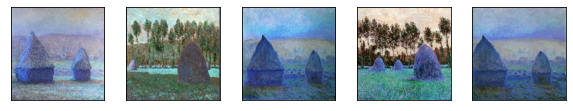

==========================CLASS 29 ===========================


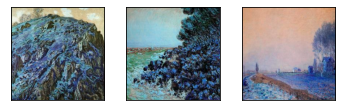

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_images(images):
    plt.figure(figsize=(10,10))
    for i, img in enumerate(images):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
    plt.show()

def get_images(images_list, class_id):
    images = []
    for img_id in images_list[class_id]:
        img = cv2.imread("/content/drive/MyDrive/deep_learning_project/data/monet_jpg/{}".format(img_id), cv2.COLOR_BGR2RGB)
        images.append(img)
    return images

for j in range(30):
    print(f'==========================CLASS {j} ===========================')
    images = get_images(groups, j)
    display_images(images[:25])

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, x)

In [ ]:
medoids = [flowers[i] for i in closest]
medoids

==========================CLASS 0 ===========================


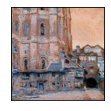

==========================CLASS 1 ===========================


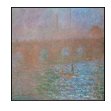

==========================CLASS 2 ===========================


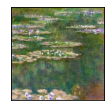

==========================CLASS 3 ===========================


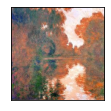

==========================CLASS 4 ===========================


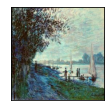

==========================CLASS 5 ===========================


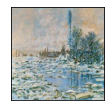

==========================CLASS 6 ===========================


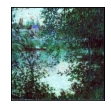

==========================CLASS 7 ===========================


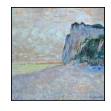

==========================CLASS 8 ===========================


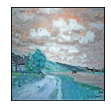

==========================CLASS 9 ===========================


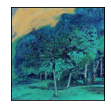

==========================CLASS 10 ===========================


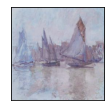

==========================CLASS 11 ===========================


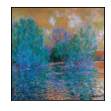

==========================CLASS 12 ===========================


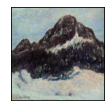

==========================CLASS 13 ===========================


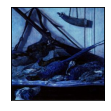

==========================CLASS 14 ===========================


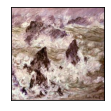

==========================CLASS 15 ===========================


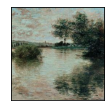

==========================CLASS 16 ===========================


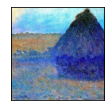

==========================CLASS 17 ===========================


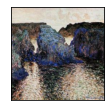

==========================CLASS 18 ===========================


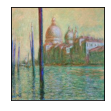

==========================CLASS 19 ===========================


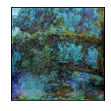

==========================CLASS 20 ===========================


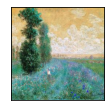

==========================CLASS 21 ===========================


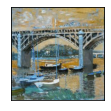

==========================CLASS 22 ===========================


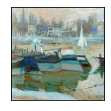

==========================CLASS 23 ===========================


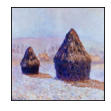

==========================CLASS 24 ===========================


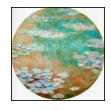

==========================CLASS 25 ===========================


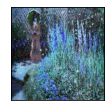

==========================CLASS 26 ===========================


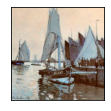

==========================CLASS 27 ===========================


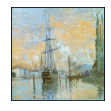

==========================CLASS 28 ===========================


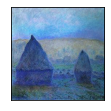

==========================CLASS 29 ===========================


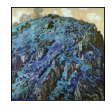

In [ ]:
import shutil
src_folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg"
dst_folder = "/content/drive/MyDrive/deep_learning_project/data/monet_jpg_content"
i = 0
medoids = [flowers[i] for i in closest]
for img_id in medoids:
    img= []
    print(f'==========================CLASS {i} ===========================')
    img.append(cv2.imread("/content/drive/MyDrive/deep_learning_project/data/monet_jpg/{}".format(img_id), cv2.COLOR_BGR2RGB))
    src_path = os.path.join(src_folder, img_id)
    dst_path = os.path.join(dst_folder, img_id)
    shutil.copy2(src_path, dst_path)
    display_images(img[:25])
    i+=1